In [29]:
#Importar las librerias necesarias para la lectura y procesamiento de datos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dftrain=pd.read_parquet('../proyecto_ML/train.parquet')


In [31]:
dftest=pd.read_parquet('../proyecto_ML/test.parquet')

In [32]:
#Verificar la correcta importacion de dftrain y brindar un primer panorama de sus columnas
dftrain.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [33]:
#Verificar la correcta importacion de dftest y brindar un primer panorama de sus columnas
dftest.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [34]:
#Revisar informacion general del DataFrame
dftrain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [9]:
#Eliminar comlumnas que no son relevantes para el estudio
dftrain=dftrain.drop(['id','url','region_url','image_url','description'], axis=1)

In [11]:
#Revisar a mayor detalle los valores nulos
dftrain.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
lat                          1722
long                         1722
state                           0
dtype: int64

In [12]:
#Eliminar valores nulos en la columna long y lat
dftrain = dftrain[dftrain.long.isna() == False]
dftrain = dftrain[dftrain.lat.isna() == False]
len(dftrain)

344757

In [13]:
#Reemplazar los valores nulos de laundry_options y parking_options
#por valores que indican ausencia de esta caracteristica
dftrain.loc[dftrain.laundry_options.isna()==True,'laundry_options']='no laundry on site'
dftrain.loc[dftrain.parking_options.isna()==True,'parking_options']='no parking'

In [14]:
#Comprobar si el tratamiento de nulos se hizo correctamente
dftrain.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

In [15]:
#Revisar los valores de la columna modificada
dftrain.laundry_options.value_counts()

w/d in unit           117798
no laundry on site     74153
w/d hookups            67543
laundry on site        52849
laundry in bldg        32414
Name: laundry_options, dtype: int64

In [16]:
#Revisar los valores de la columna modificada
dftrain.parking_options.value_counts()

no parking            128743
off-street parking    115361
attached garage        35985
carport                34972
detached garage        15233
street parking         14333
valet parking            130
Name: parking_options, dtype: int64

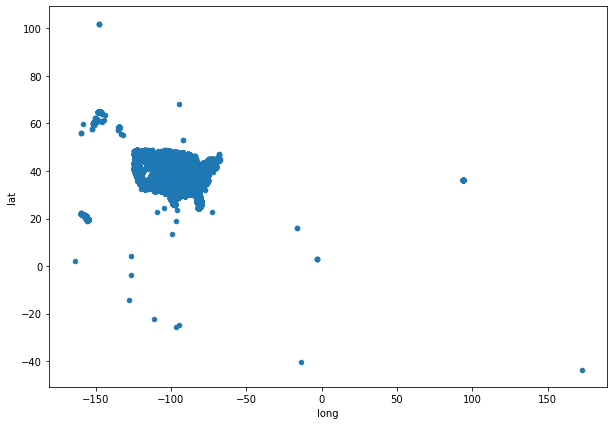

In [17]:
#Visualizar un panorama de ubicacion mediante las coordenadas del DataFrame
dftrain.plot(kind='scatter', x='long', y='lat', figsize=(10,7))

In [18]:
#Verificar la correlacion entre variables
dftrain.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.000008,0.000071,0.000160,0.001028,0.001046,0.001026,-0.000425,-0.000187,-0.000373,-0.001486,0.000810
sqfeet,0.000008,1.000000,0.004005,0.010575,-0.003769,-0.002765,-0.002165,-0.001228,-0.000147,0.001184,0.007120,-0.003083
beds,0.000071,0.004005,1.000000,0.379153,-0.023919,-0.013692,-0.001988,-0.012188,-0.005165,0.002791,0.008823,0.008232
baths,0.000160,0.010575,0.379153,1.000000,-0.020111,0.018065,-0.015325,0.019837,0.008657,0.039389,-0.080293,-0.005556
cats_allowed,0.001028,-0.003769,-0.023919,-0.020111,1.000000,0.887890,0.016238,0.122164,0.049231,-0.058808,-0.016043,0.033745
dogs_allowed,0.001046,-0.002765,-0.013692,0.018065,0.887890,1.000000,0.012881,0.128958,0.049158,-0.037334,-0.056580,0.018896
smoking_allowed,0.001026,-0.002165,-0.001988,-0.015325,0.016238,0.012881,1.000000,-0.224919,-0.096781,-0.160197,-0.177118,0.163744
wheelchair_access,-0.000425,-0.001228,-0.012188,0.019837,0.122164,0.128958,-0.224919,1.000000,0.192022,0.196768,0.002498,-0.025412
electric_vehicle_charge,-0.000187,-0.000147,-0.005165,0.008657,0.049231,0.049158,-0.096781,0.192022,1.000000,0.068812,0.025800,-0.061036
comes_furnished,-0.000373,0.001184,0.002791,0.039389,-0.058808,-0.037334,-0.160197,0.196768,0.068812,1.000000,0.004546,-0.027368


In [19]:
#Procesamiento de las variables categóricas en el dataFrame generando variables dummies
dftrain=pd.get_dummies(dftrain)
dftrain

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,1350,1200,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1115,694,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1129,900,2,2.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1580,1469,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,995,700,1,1.0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,672,660,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346475,2122,1099,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346476,1014,1104,2,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346477,935,1050,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Modulos importantes para machine learning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [21]:
#Generar dimensiones X, y para la evaluacion
X=dftrain.drop('price',axis=1)
y=dftrain['price']

In [27]:
#Dividir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
#Revisar el tamaño de la muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241329, 490), (103428, 490), (241329,), (103428,))

In [29]:
#Llamamos al modelo de regresion lineal
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [30]:
model_linear_regresion=Pipeline([
    ('linear_regression',linear_regression)
])

In [31]:
model_linear_regresion.fit(X_train,y_train)

Pipeline(steps=[('linear_regression', LinearRegression())])

In [32]:
#Prueba de una pequeña muestra
muestra_datos=X_test.iloc[:4]
model_linear_regresion.predict(muestra_datos)

array([-54769.55438213,  34038.3526908 ,  25913.40830826,  19460.22790454])

In [33]:
#Comparacion con valores reales
list(y_test.iloc[:4])

[775, 719, 700, 1950]

In [34]:
#Evaluar el modelo de regresion lineal
from sklearn.model_selection import cross_val_score
linear_scores=cross_val_score(model_linear_regresion,X,y,scoring='neg_mean_squared_error',cv=10)
linear_scores

array([-2.28654783e+10, -1.92423467e+10, -3.78463393e+10, -2.22285870e+14,
       -1.87407389e+10, -2.86126845e+10, -1.79791852e+10, -2.81498313e+10,
       -2.40923200e+10, -2.17003090e+10])

In [35]:
linear_rmse_scores=np.sqrt(-linear_scores)
linear_rmse_scores

array([  151213.35368454,   138716.78593373,   194541.3562128 ,
       14909254.50713712,   136896.81857616,   169152.84373583,
         134086.48400235,   167779.11474559,   155217.00942073,
         147310.24746193])

In [36]:
def display_scores(scores):
  print('Scores: ',scores)
  print('Mean: ',scores.mean())
  print('Standart Deviation: ',scores.std())

In [37]:
#Resultados obtenidos de modelo de regresion lineal
display_scores(linear_rmse_scores)

Scores:  [  151213.35368454   138716.78593373   194541.3562128  14909254.50713712
   136896.81857616   169152.84373583   134086.48400235   167779.11474559
   155217.00942073   147310.24746193]
Mean:  1630416.8520910768
Standart Deviation:  4426313.455643535


In [38]:
#Aplicar el modelo de Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)

model_tree_reg=Pipeline([
    ('tree_reg',tree_reg)
])

#Entrenar el modelo
model_tree_reg.fit(X_train,y_train)

Pipeline(steps=[('tree_reg', DecisionTreeRegressor(random_state=42))])

In [39]:
tree_ref_scores=cross_val_score(model_tree_reg,X,y,scoring='neg_mean_squared_error',cv=10)
tree_ref_scores

array([-4.64914295e+09, -1.92441183e+08, -1.67997502e+10, -2.22295476e+14,
       -1.79982650e+08, -9.06793219e+09, -1.83969993e+09, -4.65266576e+09,
       -7.33075906e+09, -3.27186754e+08])

In [40]:
tree_rmse_scores=np.sqrt(-tree_ref_scores)
#Resultados obtenidos de modelo de Decision Tree
display_scores(tree_rmse_scores)

Scores:  [6.81846240e+04 1.38723172e+04 1.29613851e+05 1.49095766e+07
 1.34157613e+04 9.52256908e+04 4.28917233e+04 6.82104520e+04
 8.56198520e+04 1.80883044e+04]
Mean:  1544469.922264258
Standart Deviation:  4455183.968741242


In [41]:
#Aplicar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)

In [42]:
model_forest_reg=Pipeline([
    ('forest_reg',forest_reg)
])

In [43]:
#Entrenar el modelo
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [44]:
forest_reg_scores=cross_val_score(model_tree_reg,X,y,scoring='neg_mean_squared_error',cv=10)
forest_reg_scores

array([-4.64914295e+09, -1.92441183e+08, -1.67997502e+10, -2.22295476e+14,
       -1.79982650e+08, -9.06793219e+09, -1.83969993e+09, -4.65266576e+09,
       -7.33075906e+09, -3.27186754e+08])

In [45]:
forest_rmse_score=np.sqrt(-forest_reg_scores)
#Resultados obtenidos de modelo de Random Forest
display_scores(forest_rmse_score)

Scores:  [6.81846240e+04 1.38723172e+04 1.29613851e+05 1.49095766e+07
 1.34157613e+04 9.52256908e+04 4.28917233e+04 6.82104520e+04
 8.56198520e+04 1.80883044e+04]
Mean:  1544469.922264258
Standart Deviation:  4455183.968741242


In [35]:
list_models=['Linear Regression','Decision Tree','Random Forest']
list_mean=[1630416,1544469,1544469]
list_sd=[4426313,4455183,4455183]

In [36]:
#Realizar una comparacion entre los resultados obtenidos en los 3 modelos
Resumen=pd.DataFrame([list_models,list_mean,list_sd])
Resumen=Resumen.T
Resumen = Resumen.rename(columns={0:'Modelos',
                                   1:'Mean',
                                   2:'Standard Desviation'})
Resumen

,Modelos,Mean,Standard Desviation
0,Linear Regression,1630416,4426313
1,Decision Tree,1544469,4455183
2,Random Forest,1544469,4455183


In [27]:
#Exportacion de los datos procesados
X.to_csv('drive/MyDrive/ML-Henry/X.csv')
y.to_csv('drive/MyDrive/ML-Henry/y.csv')

###Afinar el modelo elegido

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#Lista de posibles parametros
n_estimators=[3,10,30,50,80,100]
min_samples_split=[2,4,6,8]
max_depth=[2,4,6,8,10]

params={
    'forest_reg__n_estimators':n_estimators,
    'forest_reg__min_samples_split':min_samples_split,
    'forest_reg__max_depth':max_depth
}

In [49]:
#Definicion del grid de busqueda
grid=GridSearchCV(model_forest_reg,param_grid=params,cv=10,scoring='neg_mean_squared_error',verbose=2)

In [ ]:
grid.fit(X,y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
